# Лабораторная работа 9
# Численные методы — Интегралы

Для заданной функции:
1. Построить график.
2. Закрасить площадь под графиком.
3. Посчитать определенный интеграл.
4. Написать метод трапеций и метод прямоугольников.
5. Сравнить значения.
6. Показать несколько итераций работы алгоритмов с подписанными номерами итераций и данными к ним.

<br><center>Грубенко Максим (группа: М8О-210Б-20)<br>Вариант 10</center>

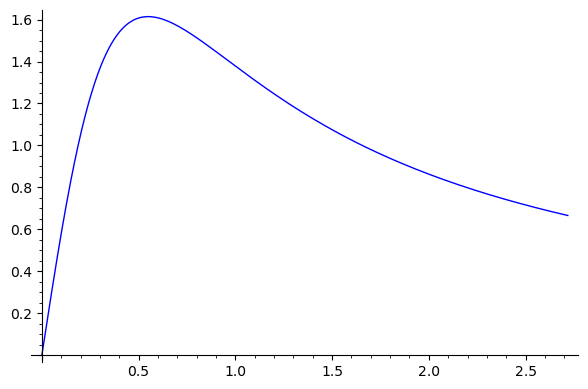

In [1]:
import numpy
var("x")

y = (8*x - arctan(2*x)) / (4*x**2 + 1)
a = 0 # нижний предел
b = e # верхний предел

plot(y, a, b)

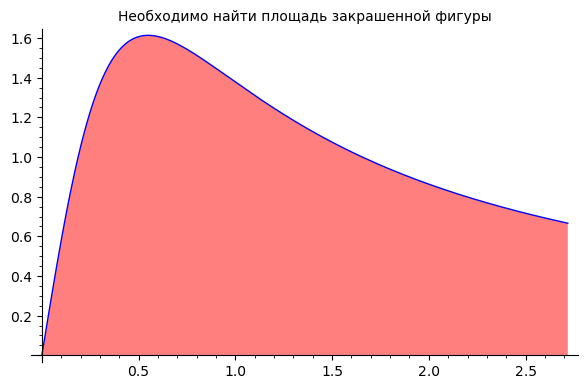

In [2]:
plot(y, a, b, fill = True, fillcolor = "red", title = "Необходимо найти площадь закрашенной фигуры")

## Метод прямоугольников

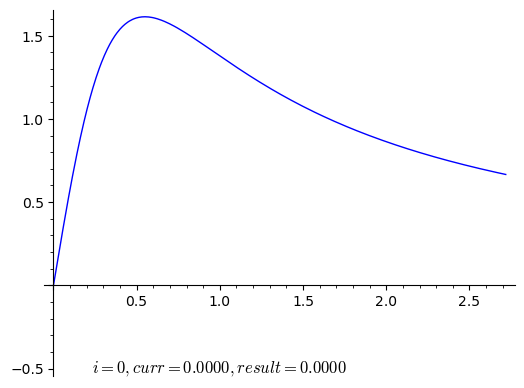

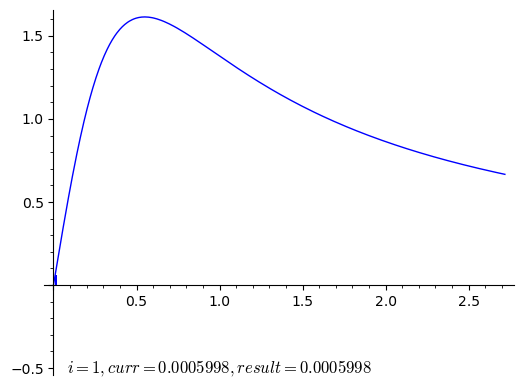

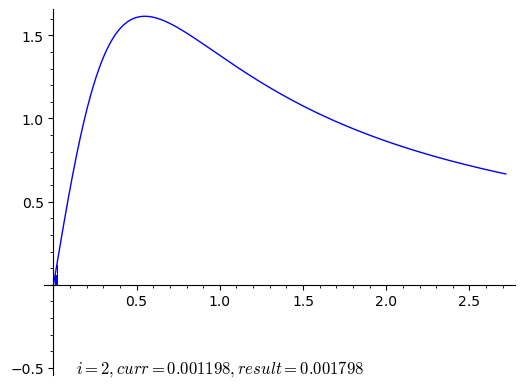

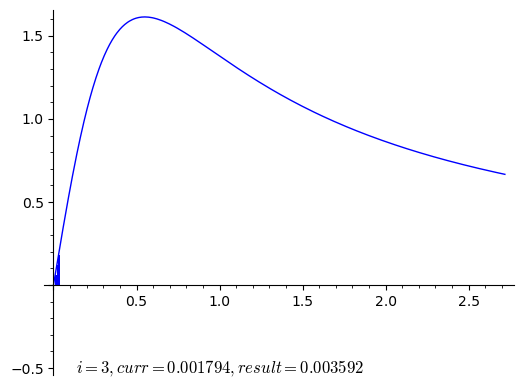

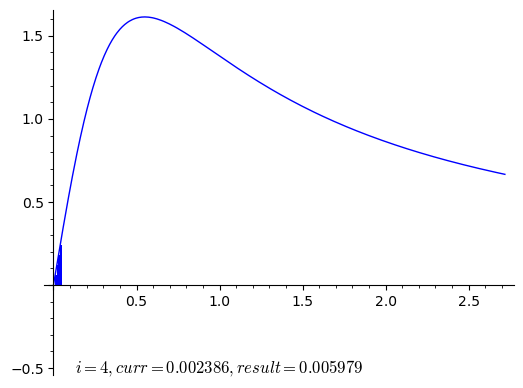

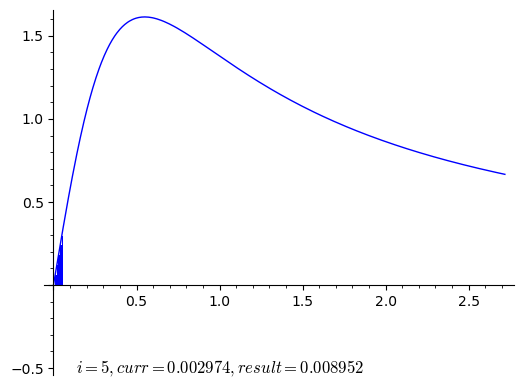

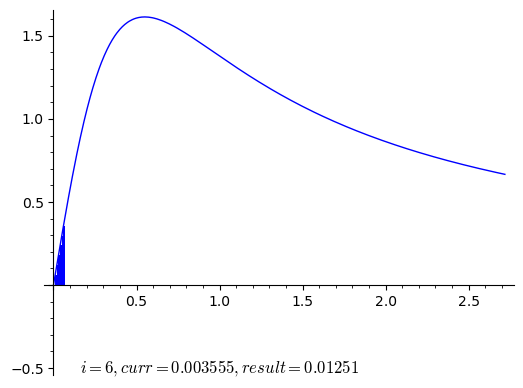

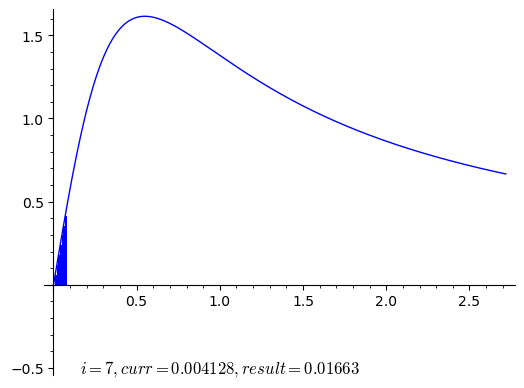

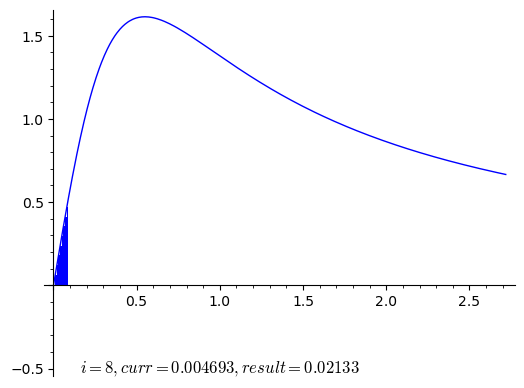

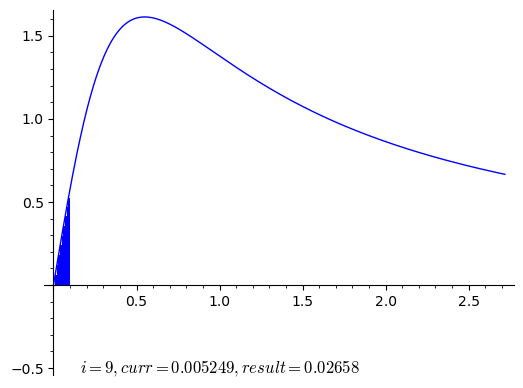

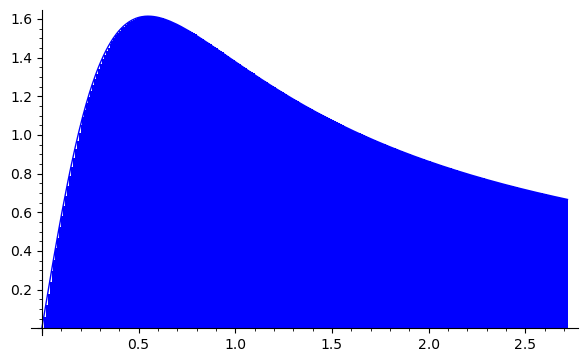

In [3]:
dx = 0.01 # приращение x

graph_rectangle = plot(y, a, b)
result_rectangle = 0
rectangles = []

for i, xi in enumerate(numpy.arange(a, b , dx)):
    dy = y(xi) # приращение y
    result_rectangle += dx*dy; # площадь маленького прямоугольника из которых будет состоять общая площадь
    
    text_ = text(r"$i={}, curr={}, result={}$".format(i, str((dx*dy).n(digits=4)), str(result_rectangle.n(digits=4))), (1,-0.5), fontsize=12, color="black")

    rectangles.append(
                   polygon2d([(xi, 0),
                   (xi + dx, 0),
                   (xi + dx, dy),
                   (xi, dy)])
                     )
    graph_rectangle += plot(rectangles[-1])
    
    if i < 10:
        (graph_rectangle + text_).show()

p = plot(sum(rectangles)) + plot(y, a, b)
p.show()

In [4]:
show(html("Значение интеграла, полученное методом прямоугольников:"))
show(LatexExpr(f"result = {latex(result_rectangle.n(digits=5))}"))

Значение интеграла, полученное методом прямоугольников:

result = 2.9351

## Метод трапеций

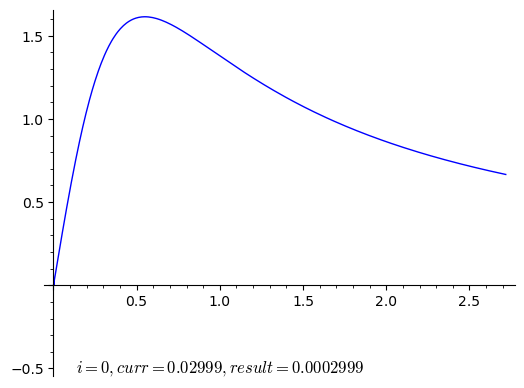

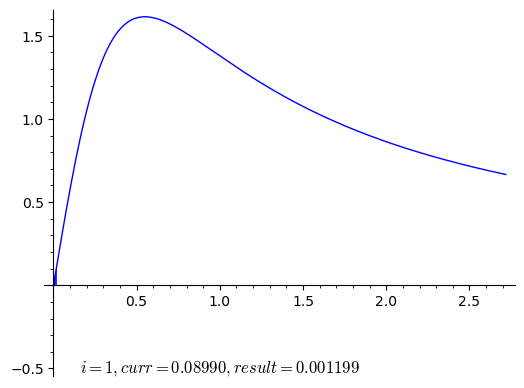

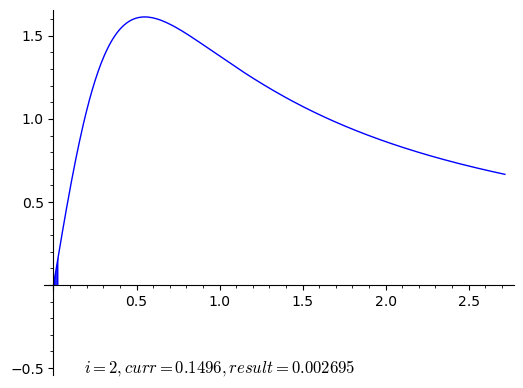

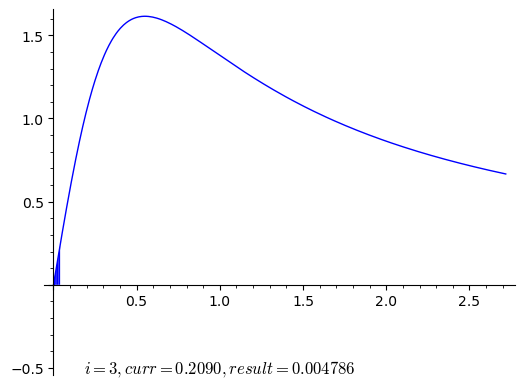

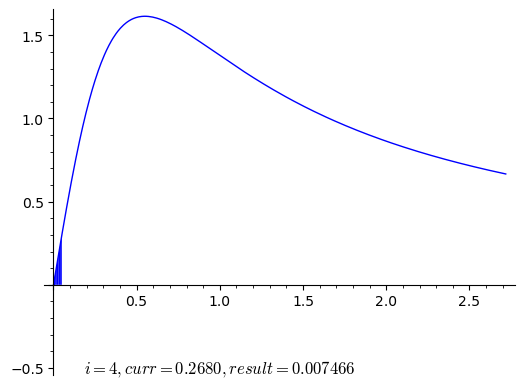

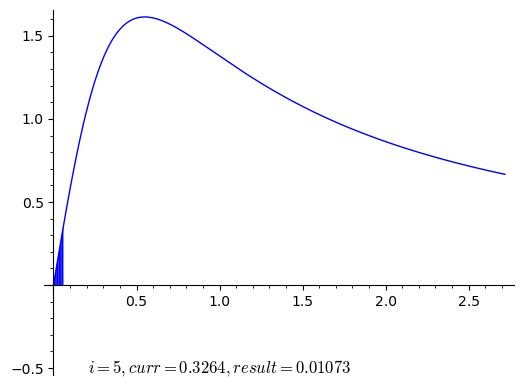

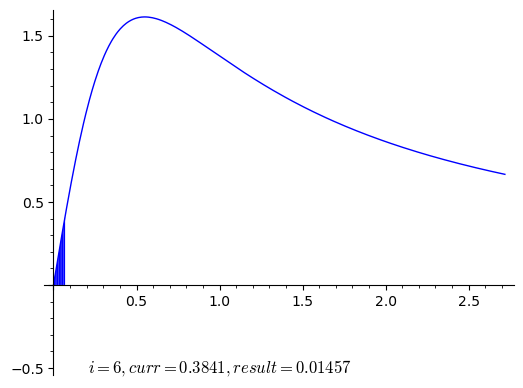

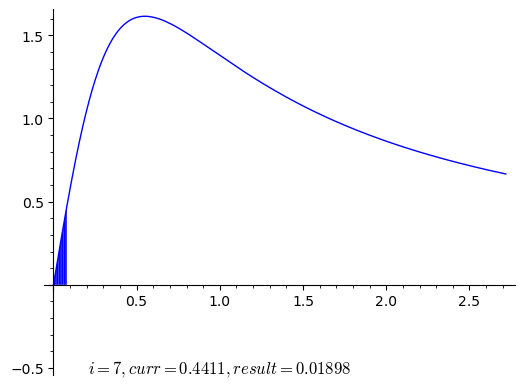

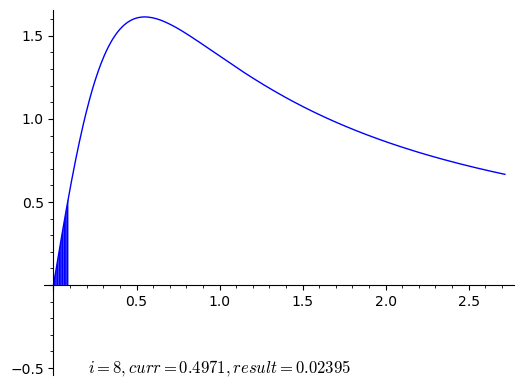

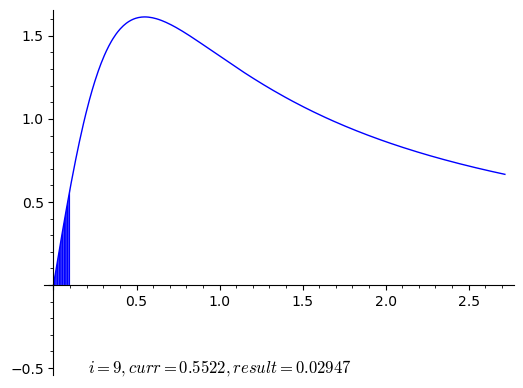

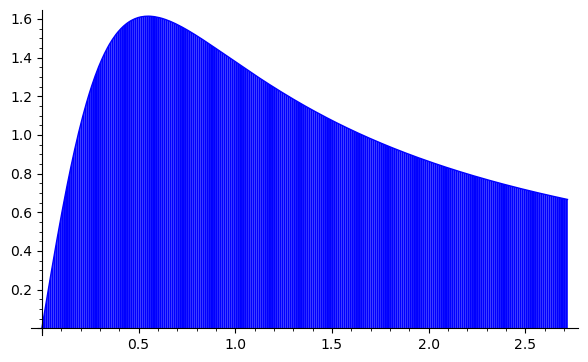

In [5]:
dx = 0.01

graph_trapezoid = plot(y, a, b)
result_trapezoid = 0
trapezoids = []


for i, xi in enumerate(numpy.arange(a, b , dx)):
    dy1 = y(xi)
    dy2 = y(xi + dx)
    result_trapezoid += (dy1 + dy2) / 2 * dx # площадь маленькой трапеции из которых будет состоять общая площадь
    
    text_ = text(r"$i={}, curr={}, result={}$".format(i, str(((dy1 + dy2) / 2).n(digits=4)), str(result_trapezoid.n(digits=4))), (1,-0.5), fontsize=12, color="black")

    trapezoids.append(
                   polygon2d([(xi, 0),
                   (xi + dx, 0),
                   (xi + dx, dy2),
                   (xi, dy1)])
                     )
    
    graph_trapezoid += plot(trapezoids[-1])
    
    if i < 10:
        (graph_trapezoid + text_).show()

p = plot(sum(trapezoids)) + plot(y, a, b)
p.show()

In [6]:
show(html("Значение интеграла, полученное методом трапеций:"))
show(LatexExpr(f"result = {latex(result_trapezoid.n(digits=5))}"))

Значение интеграла, полученное методом трапеций:

result = 2.9384

# Сравнение результатов

In [7]:
result_sage, e = numerical_integral(y, a, b)

show(html(f"Результат, полученный с помощью метода прямоугольников: ${result_rectangle}$"))
show(html(f"Результат, полученный с помощью метода трапеций: ${result_trapezoid}$"))
show(html(f"Результат, полученный с помощью втроенной функции: ${result_sage}$"))

show("")

show(html(f"Разница результата, полученного с помощью втроенной функции и с помощью метода прямоугольников: ${result_sage - result_rectangle}$"))
show(html(f"Разница результата, полученного с помощью втроенной функции и с помощью метода трапеций: ${result_sage - result_trapezoid}$"))

Результат, полученный с помощью метода прямоугольников: <script type="math/tex">2.93507788527924</script>

Результат, полученный с помощью метода трапеций: <script type="math/tex">2.93840717599072</script>

Результат, полученный с помощью втроенной функции: <script type="math/tex">2.937314588264436</script>

''

Разница результата, полученного с помощью втроенной функции и с помощью метода прямоугольников: <script type="math/tex">0.00223670298519574</script>

Разница результата, полученного с помощью втроенной функции и с помощью метода трапеций: <script type="math/tex">-0.00109258772628706</script>

In [8]:
text?